# Collaborative Filtering in Turi (formerly Dato, Formerly GraphLab)

This tutorial explains methods of collaborative filtering for recommender systems using the graphlab create package (from the company Dato). Many of the examples are manipulated versions of the the following basic tutorials:
- (deprecated) https://dato.com/learn/gallery/notebooks/basic_recommender_functionalities.html 
- (deprecated) https://dato.com/learn/gallery/notebooks/five_line_recommender.html

Furthermore, Dato has plenty of iPython notebook examples to look through that do more than just reccomendation systems, including classification, clustering, and graph analytics. 
- (deprecated) https://dato.com/learn/gallery/index.html

_____
Because many of the Turi tutorials are now deprecated, I have created a video overview of this notebook:
- https://youtu.be/I-xPNMCqW2o (also see embedded video below)
_____

As Apple decides how to use its aquisition of Turi, there might be more opportunities for using its interface. Perhaps they will even one day make the entire project open source (maybe...). 
- https://techcrunch.com/2016/08/05/apple-acquires-turi-a-machine-learning-company/

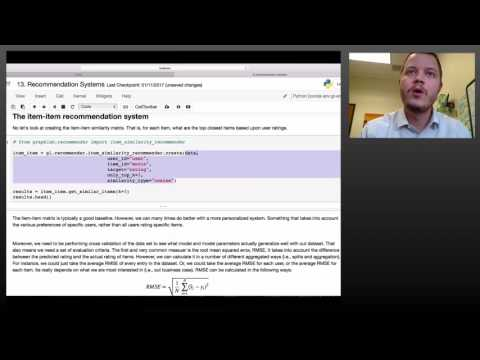

In [1]:
from IPython.display import YouTubeVideo
# a talk about this notebook from Southern Methodist University, Dallas, TX.
# Video credit: Professor Eric Larson
YouTubeVideo('I-xPNMCqW2o')

___
## The five line recommendation system (user-item)
This example will build a recommendation system for movie ratings given the following dataset of users and movie ratings. It is explained in detail at https://dato.com/learn/gallery/notebooks/five_line_recommender.html. This example hides much of the functionality and fine tuning possible, but works nicely for starting out with.

The dataset in this example comes from ~330 users that have rated ~7700 movies (a total of ~82,000 ratings).

In [2]:
# This is a well known graphlab example that builds a recommendation system in 5 lines of code

import graphlab as gl

data = gl.SFrame.read_csv("http://s3.amazonaws.com/dato-datasets/movie_ratings/training_data.csv", 
                          column_type_hints={"rating":int})
model = gl.recommender.create(data, user_id="user", item_id="movie", target="rating")
results = model.recommend(users=None, k=5)
model.save("my_model")


This non-commercial license of GraphLab Create for academic use is assigned to jdrew@smu.edu and will expire on August 09, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Jake\AppData\Local\Temp\graphlab_server_1565459554.log.0


Downloading http://s3.amazonaws.com/dato-datasets/movie_ratings/training_data.csv to C:/Users/Jake/AppData/Local/Temp/graphlab-Jake/14276/7aa82932-e5f0-4599-8fc3-7f2e0f5edeaf.csv

Finished parsing file http://s3.amazonaws.com/dato-datasets/movie_ratings/training_data.csv

Parsing completed. Parsed 100 lines in 0.098471 secs.

Finished parsing file http://s3.amazonaws.com/dato-datasets/movie_ratings/training_data.csv

Parsing completed. Parsed 82068 lines in 0.082982 secs.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 82068 observations with 334 users and 7714 items.

Data prepared in: 0.158505s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10258 / 82068 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.61874                                  |

| 5       | 0.0488281         | 1.66797                                  |

| 6       | 0.0244141         | 1.73804                                  |

| 7       | 0.012207          | 1.81845                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.61874                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 2.40073           | 1.10655               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 117.996ms    | 2.02046           | 1.13915               | 0.0976562   |

| 2       | 223.996ms    | 1.76808           | 1.06164               | 0.0580668   |

| 3       | 306.496ms    | 1.5455            | 0.976911              | 0.042841    |

| 4       | 397.496ms    | 1.36945           | 0.907582              | 0.0345267   |

| 5       | 470.497ms    | 1.19958           | 0.836535              | 0.029206    |

| 6       | 542.496ms    | 1.0539            | 0.772158              | 0.0254734   |

| 11      | 913.997ms    | 0.676023          | 0.583244              | 0.016168    |

| 25      | 2.09s        | 0.484048          | 0.474511              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.445182

Final training RMSE: 0.418937

In [3]:
results # the recommendation output

user,movie,score,rank
Jacob Smith,Gandhi,4.59946940935,1
Jacob Smith,Shall We Dance?,4.58069013155,2
Jacob Smith,From Here to Eternity,4.45290921724,3
Jacob Smith,Searching for BobbyFischer ...,4.38892673052,4
Jacob Smith,The Lion King: SpecialEdition ...,4.38708423174,5
Mason Smith,Best in Show,6.06489919222,1
Mason Smith,Apocalypse Now Redux,5.96498988664,2
Mason Smith,Six Feet Under: Season 1,5.77495120561,3
Mason Smith,Gandhi,5.53438256777,4
Mason Smith,Papillon,5.06496499574,5


In the above model creation, we have found the top five highest ranking items for each user. Two users are shown with their corresponding highest ranking items (that they have not rated).
___

In [4]:
data.head()

user,movie,rating
Jacob Smith,Flirting with Disaster,4
Jacob Smith,Indecent Proposal,3
Jacob Smith,Runaway Bride,2
Jacob Smith,Swiss Family Robinson,1
Jacob Smith,The Mexican,2
Jacob Smith,Maid in Manhattan,4
Jacob Smith,A Charlie BrownThanksgiving / The ...,3
Jacob Smith,Brazil,1
Jacob Smith,Forrest Gump,3
Jacob Smith,It Happened One Night,4


That's great!! But we really do not know how good these results are, so let's keep moving and we will come back, but using cross-validation. 


## The item-item recommendation system
No let's look at creating the item-item similarity matrix. That is, for each item, what are the top closest items based upon user ratings.

In [5]:
# from graphlab.recommender import item_similarity_recommender

item_item = gl.recommender.item_similarity_recommender.create(data, 
                                  user_id="user", 
                                  item_id="movie", 
                                  target="rating",
                                  only_top_k=3,
                                  similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head()

Recsys training: model = item_similarity

Preparing data set.

Data has 82068 observations with 334 users and 7714 items.

Data prepared in: 0.139519s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.495ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 156.491ms                           | 0                | 11              |

| 567.011ms                           | 100              | 7714            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.574984s

movie,similar,score,rank
Flirting with Disaster,Martin Lawrence: You SoCrazy ...,0.561863601208,1
Flirting with Disaster,Shadow Magic,0.535303354263,2
Flirting with Disaster,Seinfeld: Season 4,0.507150530815,3
Indecent Proposal,Cocktail,0.568772494793,1
Indecent Proposal,Beverly Hills Cop,0.516246914864,2
Indecent Proposal,Flatliners,0.513955056667,3
Runaway Bride,Notting Hill,0.613413572311,1
Runaway Bride,Sleepless in Seattle,0.60902172327,2
Runaway Bride,Maid in Manhattan,0.608688771725,3
Swiss Family Robinson,Armed and Dangerous,0.483493804932,1


The item-item matrix is typically a good baseline. However, we can many times do better with a more personalized system. Something that takes into account the various preferences of specific users, rather than all users rating specific items. 
___
Moreover, we need to be performing cross validation of the data set to see what model and model parameters actually generalize well with out dataset. That also means we need a set of evaluation criteria. The first and very common measuer is the root mean squared error, RMSE. It takes into account the difference between the predicted rating and the actual rating of items. However, we can calculate it in a number of different aggregated ways (i.e., splits and aggregation). For instance, we could just take the average RMSE of every entry in the dataset. Or, we could take the average RMSE for each user, or the average RMSE for each item. Ite really depends on what we are most interested in (i.e., out business case). RMSE can be calculated in the following ways:

$$RMSE=\sqrt{\frac{1}{N}\sum_{i=1}^N (\hat{y}_i-y_i)^2}$$

Or we can calculate the RMSE for each user, U, in our data:

$$\underbrace{RMSE(U)}_{\text{user=U}}=\sqrt{\frac{1}{|U|}\sum_{u\in U} (\hat{y}_u-y_u)^2}$$

Or we can calculate the RMSE for each item, J, in our data:

$$\underbrace{RMSE(J)}_{\text{item=J}}=\sqrt{\frac{1}{|J|}\sum_{j\in J} (\hat{y}_j-y_j)^2}$$

It's importatn to understand that RMSE(U) and RMSE(J) are arrays of averages, the size of the unique number of users or unique number of items, respectively. Therefore an approach that visualizes the distribution of values is a nice evaluation technique. It also means that statistical tests of the distributions can be used to evaluate the differences of the models. That is, "Model A has statistically smaller (with 95% confidence) per user RMSE than model B, therefore we conclude that model A has superior performance."


So let's now create a holdout set and see if we can judge the RMSE on a per-user and per-item basis:

In [6]:
train, test = gl.recommender.util.random_split_by_user(data,
                                                    user_id="user", item_id="movie",
                                                    max_num_users=100, item_test_proportion=0.2)

In [7]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')


item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="user", 
                                  item_id="movie", 
                                  target="rating",
                                  only_top_k=5,
                                  similarity_type="cosine")

rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Preparing data set.

Data has 77252 observations with 334 users and 7474 items.

Data prepared in: 0.081993s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.002ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 141.005ms                           | 0                | 4               |

| 462.502ms                           | 100              | 7474            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.468005s


Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.18      | 0.00851461400757 |
|   2    |      0.17      | 0.0114813179455  |
|   3    |      0.19      | 0.0203175491454  |
|   4    |     0.1975     | 0.0275973558931  |
|   5    |     0.194      | 0.0327684686723  |
|   6    | 0.186666666667 | 0.0354018807673  |
|   7    | 0.195714285714 | 0.0452641935336  |
|   8    |     0.1975     | 0.0512779743288  |
|   9    | 0.196666666667 |  0.055312349506  |
|   10   |     0.186      | 0.0609766860575  |
+--------+----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.6337579462711176)

Per User RMSE (best)
+------------+-------+---------------+
|    user    | count |      rmse     |
+------------+-------+---------------+
| Zion Smith |  408  | 1.80170538305 |
+------------+-------+---------------+
[1 rows x 

In [8]:
print rmse_results.viewkeys()
# print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [9]:
rmse_results['rmse_by_user']

user,count,rmse
Jeremy Smith,14,3.79007923299
Beckett Smith,60,3.5033588031
Martin Smith,17,3.99576273485
Gunner Smith,18,4.04970247332
Jesse Smith,13,3.68648775734
Miguel Smith,18,3.63792937328
Quinn Smith,24,3.99839927175
Jaden Smith,117,3.94636538672
Landon Smith,25,4.03798296576
Leo Smith,23,3.75143678111


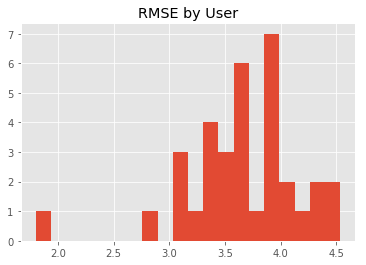

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>50]

plt.hist(rmsevals,bins=20)
plt.title('RMSE by User')
plt.show()

___
Another evaluation criterion is the per-user-recall or the per-user-precision. These are typically smaller values because they require users with a large number of ratings. The idea behind them is that, given a number of highly rated items for a user, how many of them did my model also recommend. This is inherently difficult to calculate because the user has not rated every item in the dataset---we may have found 10 items that the user would have chosen and rated highly, but if the user never rated them, we can't be sure how good we are recommending them. 

Even still, its a good measure of how well you are rating the items that are most important to the user (assuming the user rated items they had strong opinions about). Its not perfect, but its the best we have to work with.

We define the per user measures as follows: Let $p_k$ be a vector of the $k$ highest ranked recommendations for a particular user and let $a$ be the set of all positively ranked items for that user in the test set. 

The per-user-recall for k-items is given by:

$$R(k)=\frac{|a \cap p_k|}{|a|} $$

Which means, intuitively, "of all the items rated positively by the user, how many did your recommender find?"

The per-user-precision for k-items is given by:

$$P(k)=\frac{|a \cap p_k|}{k} $$

Which means, intuitively, "of the k items found by your recommender, how many were rated positively by the user?"

These, like per user RMSE, are arrays the same size as the uniqu number of users in the dataset. Therefore statistical comparisons can be completed to find superior performing models. 

In [11]:
rmse_results['precision_recall_by_user']

user,cutoff,precision,recall,count
Abel Smith,1,0.0,0.0,18
Abel Smith,2,0.0,0.0,18
Abel Smith,3,0.0,0.0,18
Abel Smith,4,0.0,0.0,18
Abel Smith,5,0.2,0.0555555555556,18
Abel Smith,6,0.166666666667,0.0555555555556,18
Abel Smith,7,0.285714285714,0.111111111111,18
Abel Smith,8,0.25,0.111111111111,18
Abel Smith,9,0.222222222222,0.111111111111,18
Abel Smith,10,0.2,0.111111111111,18


In [12]:
import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for see the following URL for the actual equation
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#graphlab.recommender.util.precision_recall_by_user
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

# the groups are not sorted

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.175625,0.123331045868,0.0831821884563,0.094006137506
10,0.186,0.140014284985,0.0609766860575,0.0901642364686
36,0.138611111111,0.0880599367995,0.144672659392,0.133677600219
26,0.152692307692,0.0959929422948,0.114283091925,0.0969296583587
41,0.13512195122,0.0867429003176,0.159311926533,0.136100188123
3,0.19,0.24154594686,0.0203175491454,0.0684283822744
1,0.18,0.384187454246,0.00851461400757,0.0359141305364
6,0.186666666667,0.173653550368,0.0354018807673,0.0710089212206
11,0.187272727273,0.135950890501,0.0647554440593,0.0900496466592
2,0.17,0.284780617318,0.0114813179455,0.0365112180182


Wow... these results appear to be not so great. Let's try something a little different and look to see if the results get better. Let's start with collaborative filtering to create the user-item matrix. 

___
## Cross Validated Collaborative Filtering

In [13]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="user", 
                                  item_id="movie", 
                                  target="rating")

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 77252 observations with 334 users and 7474 items.

Data prepared in: 0.0915s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 77252 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.61169                                  |

| 5       | 0.0488281         | 1.65675                                  |

| 6       | 0.0244141         | 1.72616                                  |

| 7       | 0.012207          | 1.80525                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.61169                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 2.36556           | 1.0984                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 98.998ms     | 2.01238           | 1.13423               | 0.0976562   |

| 2       | 160.5ms      | 1.76752           | 1.05766               | 0.0580668   |

| 3       | 225.498ms    | 1.56849           | 0.981691              | 0.042841    |

| 4       | 282.499ms    | 1.3808            | 0.910272              | 0.0345267   |

| 5       | 352.997ms    | 1.21826           | 0.839947              | 0.029206    |

| 6       | 410.001ms    | 1.07278           | 0.774449              | 0.0254734   |

| 11      | 696.498ms    | 0.677892          | 0.580057              | 0.016168    |

| 25      | 1.52s        | 0.474533          | 0.46392               | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.439671

Final training RMSE: 0.406199


Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.12      | 0.00290005267053 |
|   2    |     0.125      | 0.00548871544929 |
|   3    |      0.13      | 0.00884772812646 |
|   4    |     0.125      |  0.01117240678   |
|   5    |     0.124      | 0.0134727390962  |
|   6    |     0.125      | 0.0204068689411  |
|   7    | 0.118571428571 | 0.0217930111729  |
|   8    |     0.1225     | 0.0258116328392  |
|   9    |      0.12      | 0.0276086605307  |
|   10   |     0.117      | 0.0292847251663  |
+--------+----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.7332099444633078)

Per User RMSE (best)
+-------------+-------+----------------+
|     user    | count |      rmse      |
+-------------+-------+----------------+
| Amari Smith |   2   | 0.267106709088 |
+-------------+-------+----------------+


In [14]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.10625,0.0974278579257,0.0423148728303,0.0422518774825
10,0.117,0.129657240446,0.0292847251663,0.0361096741255
36,0.0955555555556,0.0814907402147,0.0787080002797,0.0544012110744
26,0.0988461538462,0.0895840156389,0.0596726896996,0.051699321379
41,0.0965853658537,0.0783469912699,0.0906161152393,0.060893432703
3,0.13,0.215483951452,0.00884772812646,0.0170507110393
1,0.12,0.324961536185,0.00290005267053,0.00977931554922
6,0.125,0.153432938663,0.0204068689411,0.031225692178
11,0.116363636364,0.122021539895,0.0320878812991,0.0373795062728
2,0.125,0.248746859277,0.00548871544929,0.0140886193682


___
Okay, so we are getting better, but might need to tweak the results of the classifier by regularizing...
Remember that we need to come up with a good estimate of the latent factors and we need that matrix to be a good estimate of the given ratings. We can control some of the parameters using regularization constants and increasing or decreasing the number of latent factors.

In [15]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="user", 
                                  item_id="movie", 
                                  target="rating",
                                  num_factors=16,                 # override the default value
                                  regularization=1e-02,           # override the default value
                                  linear_regularization = 1e-3)   # override the default value

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 77252 observations with 334 users and 7474 items.

Data prepared in: 0.102014s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 77252 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0953342         | Not Viable                               |

| 1       | 0.0238336         | 1.91918                                  |

| 2       | 0.0119168         | 1.94047                                  |

| 3       | 0.00595839        | 1.97958                                  |

| 4       | 0.00297919        | 2.02496                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0238336         | 1.91918                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 499us        | 2.36556           | 1.0984                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 85.499ms     | DIVERGED          | DIVERGED              | 0.0238336   |

| RESET   | 109.999ms    | 2.36535           | 1.09842               |             |

| 1       | 214.499ms    | DIVERGED          | DIVERGED              | 0.0119168   |

| RESET   | 237ms        | 2.36543           | 1.09841               |             |

| 1       | 330.006ms    | DIVERGED          | DIVERGED              | 0.00595839  |

| RESET   | 349.5ms      | 2.36556           | 1.09844               |             |

| 1       | 422.998ms    | 2.05091           | 1.0485                | 0.00297919  |

| 2       | 498ms        | 1.96341           | 1.03457               | 0.00090238  |

| 3       | 565.999ms    | 1.95292           | 1.03235               | 0.000531717 |

| 4       | 611ms        | 1.94803           | 1.0321                | 0.0003769   |

| 5       | 673.501ms    | 1.94548           | 1.03125               | 0.000291908 |

| 6       | 730.005ms    | 1.94468           | 1.0303                | 0.000238194 |

| 11      | 1.00s        | 1.9409            | 1.02891               | 0.000123086 |

| 22      | 1.53s        | 1.94054           | 1.02779               |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.94323

Final training RMSE: 1.02745


Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.2       | 0.00335050849505 |
|   2    |      0.15      | 0.00535421397352 |
|   3    | 0.146666666667 | 0.00871222045566 |
|   4    |     0.1375     |  0.010885982179  |
|   5    |     0.128      | 0.0126224278918  |
|   6    |     0.125      | 0.0156323215313  |
|   7    |      0.12      | 0.0178975719701  |
|   8    |    0.12375     | 0.0208410580682  |
|   9    | 0.122222222222 | 0.0227293612472  |
|   10   |      0.12      | 0.0249252563144  |
+--------+----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.035171067526226)

Per User RMSE (best)
+--------------+-------+----------------+
|     user     | count |      rmse      |
+--------------+-------+----------------+
| Andres Smith |   3   | 0.354276529827 |
+--------------+-------+--------------

# Is this better than the item item matrix?

In [16]:
comparison = gl.recommender.util.compare_models(test, [item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.18      | 0.00851461400757 |
|   2    |      0.17      | 0.0114813179455  |
|   3    |      0.19      | 0.0203175491454  |
|   4    |     0.1975     | 0.0275973558931  |
|   5    |     0.194      | 0.0327684686723  |
|   6    | 0.186666666667 | 0.0354018807673  |
|   7    | 0.195714285714 | 0.0452641935336  |
|   8    |     0.1975     | 0.0512779743288  |
|   9    | 0.196666666667 |  0.055312349506  |
|   10   |     0.186      | 0.0609766860575  |
+--------+----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.6337579462711176)

Per User RMSE (best)
+------------+-------+---------------+
|    user    | count |      rmse     |
+------------+-------+---------------+
| Zion Smith |  408  | 1.80170538305 |
+------------+-------

In [17]:
 comparisonstruct = gl.compare(test,[item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.18      | 0.00851461400757 |
|   2    |      0.17      | 0.0114813179455  |
|   3    |      0.19      | 0.0203175491454  |
|   4    |     0.1975     | 0.0275973558931  |
|   5    |     0.194      | 0.0327684686723  |
|   6    | 0.186666666667 | 0.0354018807673  |
|   7    | 0.195714285714 | 0.0452641935336  |
|   8    |     0.1975     | 0.0512779743288  |
|   9    | 0.196666666667 |  0.055312349506  |
|   10   |     0.186      | 0.0609766860575  |
+--------+----------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.2 

In [18]:
gl.show_comparison(comparisonstruct,[item_item, rec1])

## Parameters, Parameters
There are so many parameters to search through here. It would be great if there as something we could do to change the parameters automatically and search through the best ones...

In [19]:
params = {'user_id': 'user', 
          'item_id': 'movie', 
          'target': 'rating',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)

# also note thatthis evaluator also supports sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html?highlight=model_parameter_search

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-10-2019-12-54-3500000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-10-2019-12-54-3500000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-10-2019-12-54-3500000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-10-2019-12-54-3500000-c3bae'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-10-2019-12-54-3500000-c3bae' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-10-2019-12-54-3500000-c3bae' scheduled.


In [20]:
job.get_status()

{'Canceled': 0, 'Completed': 5, 'Failed': 0, 'Pending': 0, 'Running': 0}

In [21]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,movie,0.001,25,8,8,0.5
0,movie,0.001,25,24,8,0.1
3,movie,0.001,25,24,8,0.1
2,movie,0.001,50,8,8,0.5
4,movie,0.001,25,12,8,0.5
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,rating,user,0.353293413174,0.00902673548674,1.16055081533,0.144
0.001,rating,user,0.343113772455,0.00876171469214,0.963665875484,0.13
0.001,rating,user,0.343113772455,0.00876171469214,0.963721179567,0.13
0.001,rating,user,0.353293413174,0.00902673548674,1.16064450351,0.142


In [22]:
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'movie',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 24,
 'num_sampled_negative_examples': 8,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'rating',
 'user_id': 'user'}

In [23]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : user
 Item ID                          : movie
 Target                           : rating
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 77252
 Number of users                  : 334
 Number of items                  : 7474
 
 Training summary
 ----------------
 Training time                    : 3.1257
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 24
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 25
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 regulari

In [24]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.2       | 0.00370998561923 |
|   2    |     0.165      | 0.0063380268465  |
|   3    | 0.146666666667 | 0.00871312091682 |
|   4    |      0.14      | 0.0111849876898  |
|   5    |      0.13      | 0.0127847906784  |
|   6    | 0.123333333333 | 0.0153209747386  |
|   7    |      0.12      | 0.0176411945869  |
|   8    |    0.11125     | 0.0185683453515  |
|   9    | 0.111111111111 | 0.0212902742167  |
|   10   |     0.108      | 0.0233068627294  |
+--------+----------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    |      0.18